# DatasetとDataLoder

## Dataset

In [2]:
import torchvision
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch.nn import functional as F
from torch import optim, nn
from torch.utils.data import DataLoader, Dataset
import torchvision


In [3]:
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True)

In [4]:
# データを確認してみる
import sys
sys.getsizeof(train_dataset)

48

In [5]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
image, label = train_dataset[0]

In [7]:
image

In [8]:
label

5

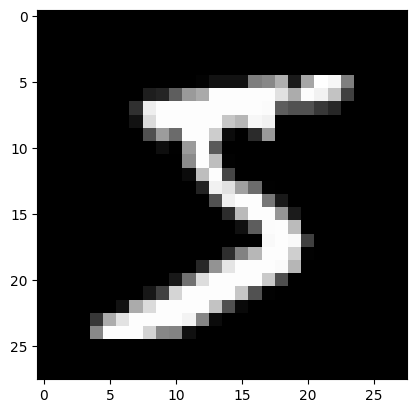

In [9]:
plt.imshow(image, cmap='gray')

In [10]:
# データ数を確認する
len(train_dataset)

60000

## Transform

In [11]:
# ToTensor()
# ()(image)はインスタンスをつくって、そのインスタンスでimageをテンソル変換する
# 0 ~ 1
image_tensor = torchvision.transforms.ToTensor()(image)

In [12]:
type(image_tensor)

torch.Tensor

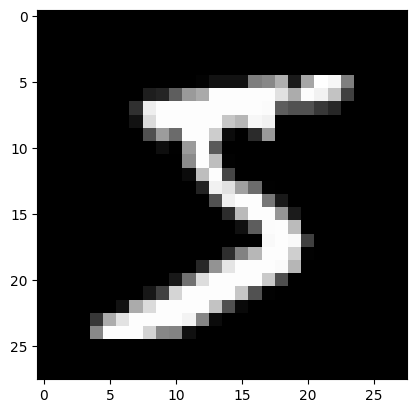

In [13]:
plt.imshow(image_tensor[0], cmap='gray')

In [14]:
# .Normailze()
# タプル形式で渡す
normalize_tensor = torchvision.transforms.Normalize((0.5,), (0.5, ))(image_tensor)
normalize_tensor 

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [15]:
# -1 ~ 1
print(normalize_tensor.min(), normalize_tensor.max())

tensor(-1.) tensor(1.)


In [16]:
# .Compose()
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

transformed_image = transform(image)

In [17]:
image

In [18]:
transformed_image.shape

torch.Size([1, 28, 28])

In [19]:
# データをとってくる時に、transformしてくれる
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

In [20]:
image, label = train_dataset[0]
image

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## DataLoader

In [21]:
# データをとってくる時に、transformしてくれる
train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=10,num_workers=2)

In [23]:
images, labels = next(iter(train_loader))
print(images.shape)

# (バッチサイズ、チャネル数, たて、よこ)

torch.Size([10, 1, 28, 28])


In [24]:
grid_images = torchvision.utils.make_grid(images)

In [25]:
grid_images.shape

torch.Size([3, 62, 242])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


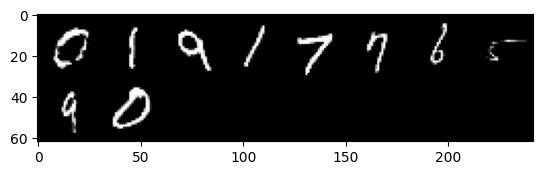

In [26]:
plt.imshow(torch.permute(grid_images,( 1, 2, 0)))

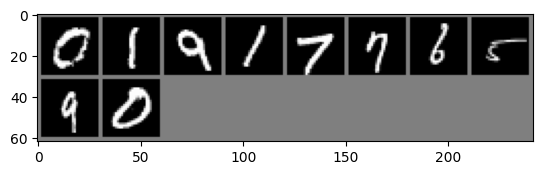

In [27]:
# 正規化を戻した方がより正確な画像になる
grid_images = grid_images / 2 + 0.5
plt.imshow(torch.permute(grid_images, (1, 2, 0)))

In [28]:
labels

tensor([0, 1, 9, 1, 7, 7, 6, 5, 9, 0])

## DataLoaderを学習ループに追加する

In [29]:
# dataset




In [30]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size,num_workers=2)


In [33]:
#nnクラスとF.関数を組み合わせて作成する
# MLP(親のクラス(継承する))
class MLP(nn.Module):
    
    def __init__(self, num_in, num_hidden, num_out):
        # 親のclassの継承
        super().__init__()
        # flattenはよく使う (画像データの場合1番最初のLinear層の前には必ず使うと思って良い.)
        self.flatten = nn.Flatten() # [b, c, h, w] -> [b, cxhxw] 
        self.l1 = nn.Linear(num_in, num_hidden)
        self.l2 = nn.Linear(num_hidden, num_out) # 出力層の全結合層

    # forwardの処理(順伝播の処理)
    def forward(self, x):
        x = self.l2(F.relu(self.l1(self.flatten(x))))
        return x

num_in = 28 * 28
num_hidden = 30
num_out = 10
learning_rate = 0.01

# モデルの初期化
model = MLP(num_in, num_hidden, num_out)
opt = optim.SGD(model.parameters(), lr = learning_rate)

# ログ
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(5):
    running_loss = 0.0
    running_val_loss = 0.0
    running_val_accuracy = 0.0


    for train_batch, data in enumerate(train_loader):

        X, y = data
        
        # 順伝播と逆伝播の計算
        opt.zero_grad()
        # forward
        preds  = model(X)
        loss = F.cross_entropy(preds, y)
        running_loss += loss.item()

        # backword
        loss.backward()
        opt.step()

    # validtion
    with torch.no_grad():
        for val_batch, data in enumerate(val_loader):
            X_val, y_val = data
            preds_val = model(X_val)
            val_loss = F.cross_entropy(preds_val, y_val)
            running_val_loss += val_loss.item()
            val_accuracy = torch.sum(torch.argmax(preds_val, dim=-1) == y_val) / y_val.shape[0]
            running_val_accuracy += val_accuracy.item()

    train_losses.append(running_loss/(train_batch + 1))
    val_losses.append(running_val_loss/(val_batch + 1))
    val_accuracies.append(running_val_accuracy/(val_batch + 1))
    print(f'epoch : {epoch}: train error : {train_losses[-1]}, validation error : {val_losses[-1]},val accuracy {val_accuracies[-1]}')



epoch : 0: train error : 0.6029014398415884, validation error : 0.337726777722946,val accuracy 0.8989616613418531
epoch : 1: train error : 0.3223776859462261, validation error : 0.28980891805546827,val accuracy 0.9148362619808307
epoch : 2: train error : 0.28227279508709907, validation error : 0.25768559892325643,val accuracy 0.9237220447284346
epoch : 3: train error : 0.25432594294448696, validation error : 0.2312224578207579,val accuracy 0.932008785942492
epoch : 4: train error : 0.23204389471511047, validation error : 0.22466862620934605,val accuracy 0.9345047923322684


In [ ]:
# 学習曲線
plt.plot(train_losses, label = 'train_loss')
plt.plot(val_losses, label ='val_loss')

## カスタムのDatasetを作る

In [ ]:
class MyDataset(Dataset):

    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X = self.X[idx]
        y = self.y[idx]

        if self.transform:
            X = self.transform(X)

        return X, y

In [ ]:
# 自前のデータだと仮定する
dataset = datasets.load_digits()
target = dataset['target']
images = dataset['images']
# imagesのnumpy配列が0 ~ 16 -> 0 ~ 255に変換
images = images * (255. / 16.)
images = images.astype(np.uint8)
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size=0.2, random_state=42)

In [ ]:
train_mydataset = MyDataset(X_train, y_train)

In [99]:
len(train_mydataset)

1437

In [100]:
# transforms.ToTensor() # 0 ~ 255 -> 0 ~ 1に変換

In [101]:
train_mydataset[0]

(array([[  0,   0,  47, 223,  15,   0,   0,   0],
        [  0,   0, 191, 191,   0,   0,   0,   0],
        [  0,  47, 255,  95,   0,   0,   0,   0],
        [  0,  79, 255,  31,   0,   0,   0,   0],
        [  0,  95, 255,  31,  79,  31,   0,   0],
        [  0,  63, 255,  31, 191, 239,  31,   0],
        [  0,  15, 223, 207,  31, 207, 175,   0],
        [  0,   0,  47, 175, 255, 207,  63,   0]], dtype=uint8),
 6)

In [103]:
# tensor変換
transform = transforms.Compose([
    transforms.ToTensor(), # 0 ~ 255 -> 0 ~ 1
    transforms.Normalize((0.5, ), (0.5, )), # 0 ~ 1 -> -1 ~ 1
])

In [114]:
train_mydataset = MyDataset(X_train, y_train, transform=transform)
val_mydataset = MyDataset(X_val, y_val, transform=transform)


In [115]:
train_mydataset[0]

(tensor([[[-1.0000, -1.0000, -0.6314,  0.7490, -0.8824, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -1.0000,  0.4980,  0.4980, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.6314,  1.0000, -0.2549, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.3804,  1.0000, -0.7569, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-1.0000, -0.2549,  1.0000, -0.7569, -0.3804, -0.7569, -1.0000,
           -1.0000],
          [-1.0000, -0.5059,  1.0000, -0.7569,  0.4980,  0.8745, -0.7569,
           -1.0000],
          [-1.0000, -0.8824,  0.7490,  0.6235, -0.7569,  0.6235,  0.3725,
           -1.0000],
          [-1.0000, -1.0000, -0.6314,  0.3725,  1.0000,  0.6235, -0.5059,
           -1.0000]]]),
 6)

In [116]:
val_dataset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [117]:
batch_size = 10
train_myloader = DataLoader(train_mydataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_myloader = DataLoader(val_mydataset, batch_size=batch_size,num_workers=2)

In [118]:
images, labels = next(iter(train_myloader))

In [121]:
grid_images = torchvision.utils.make_grid(images)
grid_images.shape

torch.Size([3, 22, 82])

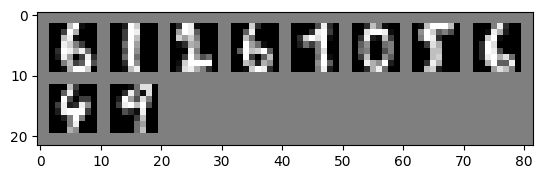

In [123]:
# -1 ~ 1から0 ~ 1にする
grid_images = grid_images / 2 + 0.5
plt.imshow(torch.permute(grid_images, (1, 2, 0)))